In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar
from numpy.linalg import norm

from numpy import pi, tan, square, sin, arctan, cos

In [2]:
theta = np.pi / 2
phi = 0

In [3]:
# units
ns = 10**(-9) # nano second

In [4]:
state_a = np.array([1,0,0])
state_zero = np.array([0,1,0])
state_one = np.array([0,0,1])

In [5]:
state_bright = np.sin(theta/2) * state_zero - np.cos(theta/2) * np.exp(-1 * 1j * phi) * state_one

## X/2 Gate

In [6]:
# helper functions
plt.clf()
def beta(t):
    return pi * square(sin(pi * t / tau))

def beta_dot(t):
    return pi**2  * sin(2*pi * t/ tau)/tau

def f(t, eta):
    return eta * (2 * beta(t) - 2 * sin(2 * beta(t)))

def phi(t, eta=1):
    return 2 * eta * (sin(beta(t)) / 2 - sin(3 * beta(t)) / 6)

def phi_dot(t, eta=1):
    return 2 * eta * (cos(beta(t)) / 2 - cos(3 * beta(t)) / 2) * beta_dot(t)

# the actual functions from the hamiltonian
def phi_1(t, eta=1):
    if t < ns:
        return np.pi/2
    if np.abs(t - tau/2) < ns:
        return np.pi / 2
    if t > tau/2:
        return arctan(beta_dot(t) / phi_dot(t,eta) / tan(beta(t))) - phi(t,eta) + np.pi/2
    return arctan(beta_dot(t) / phi_dot(t,eta) / tan(beta(t))) - phi(t,eta)

def Omega(t, eta=1):
    if t > tau/2:
        return Omega(t - tau/2, eta=eta)
    width = 1
    if np.abs(t - tau/2) < width*ns or np.abs(t - tau) < width*ns or np.abs(t) < width * ns:
        return 0
    return beta_dot(t) / sin(phi(t,eta) + phi_1(t,eta))

phi_1 = np.vectorize(phi_1)
Omega = np.vectorize(Omega)

tau = 500 * ns
t = np.linspace(0,tau,1000)

<Figure size 640x480 with 0 Axes>

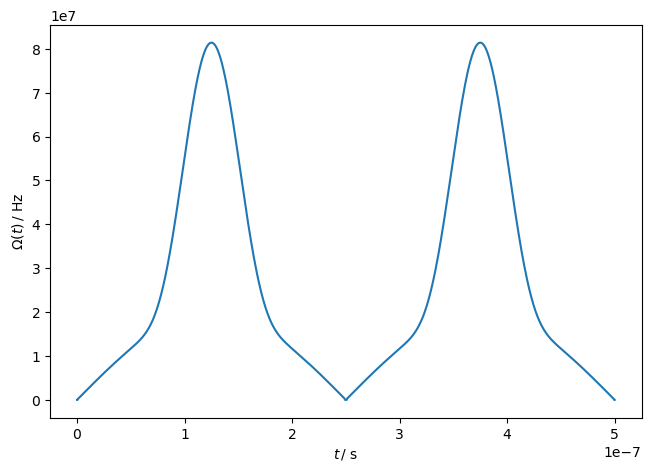

In [7]:
plt.clf()
plt.plot(t, Omega(t))
plt.tight_layout()
plt.xlabel(r'$t \, / $ s')
plt.ylabel(r'$\Omega(t) \, / $ Hz')
plt.savefig('build/1-Omega.pdf')

/tmp/ipykernel_21723/2624616977.py:25: RuntimeWarning: divide by zero encountered in double_scalars
  return arctan(beta_dot(t) / phi_dot(t,eta) / tan(beta(t))) - phi(t,eta) + np.pi/2


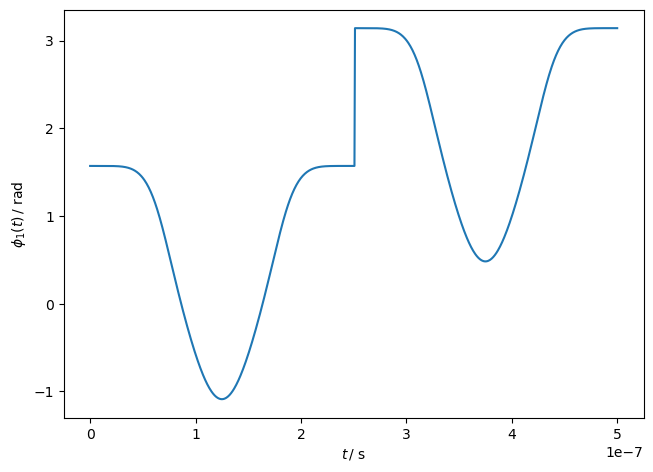

In [8]:
plt.clf()
plt.plot(t, phi_1(t))
plt.tight_layout()
plt.xlabel(r'$t \, / $ s')
plt.ylabel(r'$\phi_1(t) \, / $ rad')
plt.savefig('build/1-phi_1.pdf')

In [9]:
def Hamiltonian(t):
    H = np.matrix(Omega(t) / 2 * np.exp(-1 * 1j * phi_1(t)) * np.outer(state_bright, state_a))
    
    return H + H.H

10% done
20% done
30% done
40% done
50% done
60% done
70% done
80% done
90% done


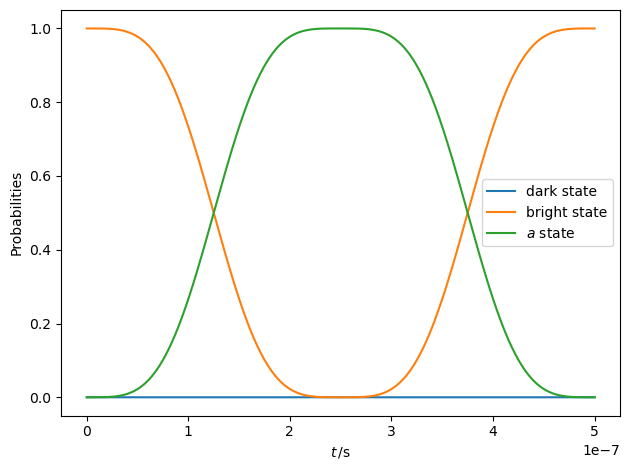

In [10]:
plt.clf()

psi_0 = state_bright

dt = ns / 100
T = 0

hbar = 1

progress = 0
N = int(tau / dt)
i = 1

psi_t = np.zeros([N,3], dtype=complex)
psi_t[0,:] = psi_0

while i < N:
    
    if np.floor(T / tau * 10) > progress:
        progress += 1
        print(f'{progress}0% done')
    dpsi = np.array(np.dot(Hamiltonian(T), psi_t[i-1,:])).reshape(3) / (1j * hbar) * dt
    psi_new = psi_t[i-1,:] + dpsi
    psi_norm = complex(psi_new * np.matrix(psi_new).H)
    psi_t[i,:] = psi_new / psi_norm
    
    i += 1
    T += dt
    
t = np.linspace(0,tau,N)

skip = 1
plt.plot(t[::skip], np.square(np.abs(psi_t[::skip,1] + psi_t[::skip,2])) / 2, label=r'dark state')
plt.plot(t[::skip], np.square(np.abs(psi_t[::skip,1] - psi_t[::skip,2])) / 2, label=r'bright state')

plt.plot(t[::skip], np.square(np.abs(psi_t[::skip,0])), label=r'$a$ state')

plt.xlabel(r'$t\, / $s')
plt.ylabel(r'Probabilities')

plt.tight_layout()
plt.legend()
plt.savefig('build/1-probabilities.pdf')

In [11]:
psi_fin = psi_t[-1]
print(psi_fin)

[ 1.24009991e-04+1.25251184e-04j  1.65275022e-08+7.07106770e-01j
 -1.65275022e-08-7.07106770e-01j]


## X Gate

In [12]:
# helper functions
def beta(t):
    return pi * square(sin(pi * t / tau))

def beta_dot(t):
    return pi**2  * sin(2*pi * t/ tau)/tau

def f(t, eta):
    return eta * (2 * beta(t) - 2 * sin(2 * beta(t)))

def phi(t, eta=1):
    return 2 * eta * (sin(beta(
        t)) / 2 - sin(3 * beta(t)) / 6)

def phi_dot(t, eta=1):
    return 2 * eta * (cos(beta(t)) / 2 - cos(3 * beta(t)) / 2) * beta_dot(t)

# the actual functions from the hamiltonian
def phi_1(t, eta=1):
    if t < ns:
        return pi/2
    if np.abs(t - tau/2) < ns:
        return np.pi / 2
    return arctan(beta_dot(t) / phi_dot(t,eta) / tan(beta(t))) - phi(t,eta)

def Omega(t, eta=1):
    if t > tau/2:
        return Omega(t - tau/2, eta=eta)
    width = 1
    if np.abs(t - tau/2) < width*ns or np.abs(t - tau) < width*ns or np.abs(t) < width * ns:
        return 0
    return beta_dot(t) / sin(phi(t,eta) + phi_1(t,eta))

phi_1 = np.vectorize(phi_1)
Omega = np.vectorize(Omega)

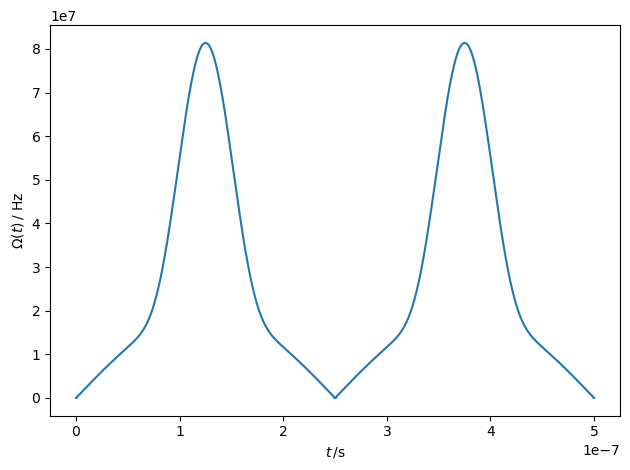

In [13]:
plt.clf()

t = np.linspace(0,tau, num=1000, dtype=float)

plt.plot(t, Omega(t), label=r'$\Omega(t)$')

plt.ylabel(r'$\Omega(t) \, / $ Hz')
plt.xlabel(r'$t \, /$s')
plt.tight_layout()
plt.savefig('build/2-Omega.pdf')

/tmp/ipykernel_21723/2613914696.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  return arctan(beta_dot(t) / phi_dot(t,eta) / tan(beta(t))) - phi(t,eta)


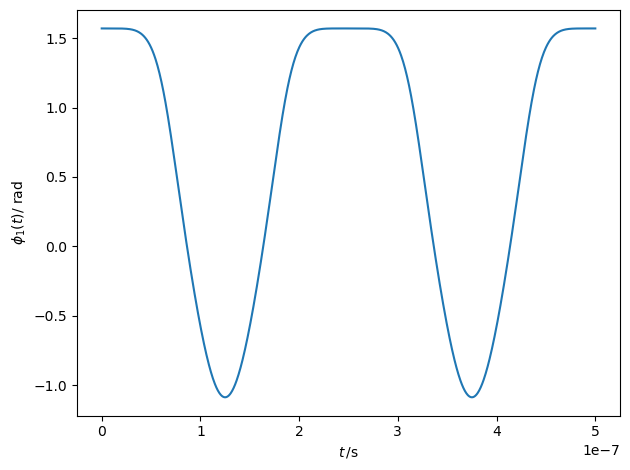

In [14]:
plt.clf()

t = np.linspace(0,tau, num=1000, dtype=float)

plt.plot(t, phi_1(t), label=r'$\phi(t)$')

plt.ylabel(r'$\phi_1(t) / $ rad')
plt.xlabel(r'$t \, / $s')
plt.tight_layout()
plt.savefig('build/2-phi_1.pdf')

In [15]:
def Hamiltonian(t):
    H = np.matrix(Omega(t) / 2 * np.exp(-1 * 1j * phi_1(t)) * np.outer(state_bright, state_a))
    
    return H + H.H

In [16]:
Hamiltonian(0)

matrix([[ 0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j, -0.+0.j]])

In [17]:
phi_1([0])

array([1.57079633])

10% done
20% done
30% done
40% done
50% done
60% done
70% done
80% done
90% done


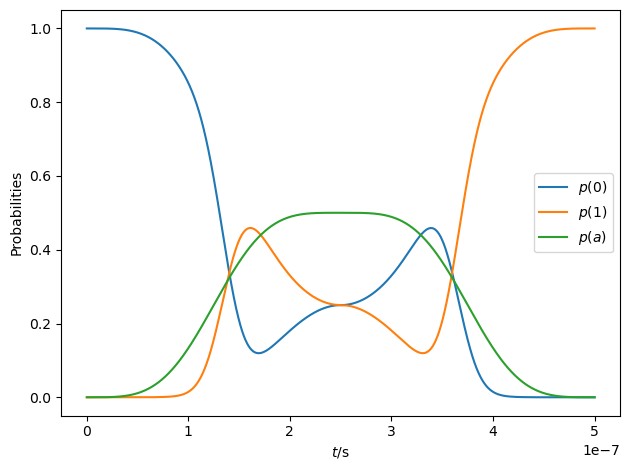

In [18]:
plt.clf()

psi_0 = state_zero

dt = ns / 100
T = 0
tau = 500 * ns

hbar = 1

progress = 0
N = int(tau / dt)
i = 1

psi_t = np.zeros([N,3], dtype=complex)
psi_t[0,:] = psi_0

while i < N:
    
    if np.floor(T / tau * 10) > progress:
        progress += 1
        print(f'{progress}0% done')
    dpsi = np.array(np.dot(Hamiltonian(T), psi_t[i-1,:])).reshape(3) / (1j * hbar) * dt
    psi_new = psi_t[i-1,:] + dpsi
    psi_norm = complex(psi_new * np.matrix(psi_new).H)
    psi_t[i,:] = psi_new / psi_norm
    
    i += 1
    T += dt
    
    
psi_fin = psi_t[-1]    
t = np.linspace(0,tau,N)

skip = 1
plt.plot(t[::skip], np.square(np.abs(psi_t[::skip,1])), label=r'$p(0)$')
plt.plot(t[::skip], np.square(np.abs(psi_t[::skip,2])) , label=r'$p(1)$')

plt.plot(t[::skip], np.square(np.abs(psi_t[::skip,0])), label=r'$p(a)$')

plt.legend()

plt.xlabel(r'$t / $s')
plt.ylabel(r'Probabilities')

plt.tight_layout()
plt.tight_layout()
plt.savefig('build/2-probabilities.pdf')

In [19]:
def XGate(psi_0, alpha=1, dt = ns / 10):
    T = 0
    tau = 500 * ns

    hbar = 1

    N = int(tau / dt)
    i = 1

    psi_t = np.zeros([N,3], dtype=complex)
    psi_t[0,:] = psi_0

    while i < N:
        dpsi = alpha * np.array(np.dot(Hamiltonian(T), psi_t[i-1,:])).reshape(3) / (1j * hbar) * dt
        psi_new = psi_t[i-1,:] + dpsi
        psi_norm = complex(psi_new * np.matrix(psi_new).H)
        psi_t[i,:] = psi_new / psi_norm

        i += 1
        T += dt


    psi_fin = psi_t[-1]    
    return psi_fin

def fidelity_X(psi_0, psi_cor, alpha=1, dt= ns/10):
    psi_fin = XGate(psi_0, alpha=alpha, dt=dt)
    err = np.sqrt(np.sum(np.square(np.abs(psi_fin - psi_cor))))
    return 1- err

In [20]:
psi_0 = state_zero
psi_cor = state_one

alpha = np.linspace(0.8, 1.2, num=100)
fid = []

for a in alpha:
    fid.append(fidelity_X(psi_0, psi_cor, alpha=a, dt=ns/1))

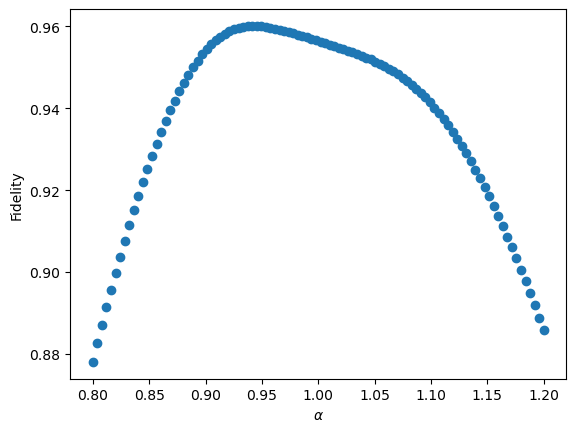

In [21]:
plt.clf()

plt.scatter(alpha, fid)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'Fidelity')

plt.savefig('build/error.pdf')